In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Create a Node class to create a node
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

        
from typing import List
# Create a LinkedList class 
class LinkedList:
    def __init__(self,data:List[int] = None):
        self.head = None
        for datum in data:
            self.insertAtEnd(datum)
 
    # Method to add a node at begin of LL
    def insertAtBegin(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
            return
        else:
            new_node.next = self.head
            self.head = new_node
 
    # Method to add a node at any index
    # Indexing starts from 0.
    def insertAtIndex(self, data, index):
        new_node = Node(data)
        current_node = self.head
        position = 0
        if position == index:
            self.insertAtBegin(data)
        else:
            while(current_node != None and position+1 != index):
                position = position+1
                current_node = current_node.next
 
            if current_node != None:
                new_node.next = current_node.next
                current_node.next = new_node
            else:
                print("Index not present")
 
    # Method to add a node at the end of LL
 
    def insertAtEnd(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
            return
 
        current_node = self.head
        while(current_node.next):
            current_node = current_node.next
 
        current_node.next = new_node
 
    # Update node of a linked list
        # at given position
    def updateNode(self, val, index):
        current_node = self.head
        position = 0
        if position == index:
            current_node.data = val
        else:
            while(current_node != None and position != index):
                position = position+1
                current_node = current_node.next
 
            if current_node != None:
                current_node.data = val
            else:
                print("Index not present")
 
    # Method to remove first node of linked list
 
    def remove_first_node(self):
        if(self.head == None):
            return
 
        self.head = self.head.next
 
    # Method to remove last node of linked list
    def remove_last_node(self):
 
        if self.head is None:
            return
 
        current_node = self.head
        while(current_node.next.next):
            current_node = current_node.next
 
        current_node.next = None
 
    # Method to remove at given index
    def remove_at_index(self, index):
        if self.head == None:
            return
 
        current_node = self.head
        position = 0
        if position == index:
            self.remove_first_node()
        else:
            while(current_node != None and position+1 != index):
                position = position+1
                current_node = current_node.next
 
            if current_node != None:
                current_node.next = current_node.next.next
            else:
                print("Index not present")
 
    # Method to remove a node from linked list
    def remove_node(self, data):
        current_node = self.head
 
        if current_node.data == data:
            self.remove_first_node()
            return
 
        while(current_node != None and current_node.next.data != data):
            current_node = current_node.next
 
        if current_node == None:
            return
        else:
            current_node.next = current_node.next.next
 
    # Print the size of linked list
    def sizeOfLL(self):
        size = 0
        if(self.head):
            current_node = self.head
            while(current_node):
                size = size+1
                current_node = current_node.next
            return size
        else:
            return 0
    
    def __str__(self):
        string = ""
        current_node = self.head
        while(current_node):
            string += str(current_node.data)+" -> "
            current_node = current_node.next
        string += "(None)"
        return string
    


In [3]:
# create a new linked list
llist = LinkedList(data=[2,1])
 
# add nodes to the linked list
llist.insertAtEnd('a')
llist.insertAtEnd('b')
llist.insertAtBegin('c')
llist.insertAtEnd('d')
llist.insertAtIndex('g', 2)
 
# print the linked list
print("Node Data")
print(llist)
 
# remove a nodes from the linked list
print("\nRemove First Node")
llist.remove_first_node()
print("Remove Last Node")
llist.remove_last_node()
print("Remove Node at Index 1")
llist.remove_at_index(1)
 
 
# print the linked list again
print("\nLinked list after removing a node:")
print(llist)
 
print("\nUpdate node Value")
llist.updateNode('z', 0)
print(llist)

 
print("\nSize of linked list :", end=" ")
print(llist.sizeOfLL())

Node Data
c -> 2 -> g -> 1 -> a -> b -> d -> (None)

Remove First Node
Remove Last Node
Remove Node at Index 1

Linked list after removing a node:
2 -> 1 -> a -> b -> (None)

Update node Value
z -> 1 -> a -> b -> (None)

Size of linked list : 4


In [55]:
def expand_new_pulse(t_start,t_width):
    assert(t_start == int(t_start))
    assert(t_width == int(t_width))
    assert(t_start >= 0)
    assert(t_width > 0)
    
    ts=[t_start]
    expanded = [0]
    
    ts+= list(range(t_start,t_start+t_width+1))
    expanded+= [1]*(t_width+1)
    
    ts.append(t_start+t_width)
    expanded.append(0)
    
    return ts, expanded

class PulseTrain(LinkedList):
    
    def __init__(self,data:List[int] = None, verbose:bool = False):
        self.head = None
        self.verbose = verbose
        self.total_duration = 0
        for datum in data:
            #Ignore zeros
            if datum:
                #Cast all data as integer
                self.insertAtEnd(int(datum))
                self.total_duration += np.abs(datum)
                
    def vprint(self,string):
        """
        avoid annoying cases to check if verbose is enabled
        """
        if self.verbose:
            print(string)

    
    def expand(self,t_offset = 0):
        """
        Return a list that is suitable for plotting pulse trains
        Do not plot, just return the lists
        """
        expanded = []
        t = t_offset
        ts = []
        current_node = self.head
        while(current_node):
            ele = (np.sign(current_node.data)+1)/2 
            duration =np.abs(current_node.data)
            expanded += (duration+1)*[ele]
            ts += [t+i for i in range(duration+1)]
            t += duration
            current_node = current_node.next
        return ts,expanded

    def get_data(self):
        """
        Return a list of the data at all the nodes
        """
        data=[]
        current_node = self.head
        while(current_node):
            data.append(current_node.data)
            current_node = current_node.next
        return data
    
    def add_pulse(self,t_start: int, t_width:int):
        """
        """
        assert( t_start >= 0)
        assert( t_width >= 0) 
        
        ## Easy cases do a quick traverse, no math
        if (self.total_duration < t_start):
            self.vprint("Adding new pulse to end of train")
            self.insertAtEnd( self.total_duration-t_start  )
            self.insertAtEnd( t_width )
            self.total_duration = t_width+t_start
            return
        
        elif (self.total_duration ==  t_start):
            self.vprint("Adding new pulse snug up to end of train")
            self.insertAtEnd( t_width )
            self.total_duration = t_width+t_start
            return
        
        idx=0
        current_node = self.head
        while (t_width >0):
            self.vprint(f"{idx=}, {current_node.data=}, {t_start=}, {t_width=}")
            
            duration = np.abs(current_node.data)
            delay = t_start-duration
            if (delay >= 0):
                # Skip this pulse
                self.vprint(f"Skipping pulse, new pulse doesnt start till after")
                t_start -= duration
                idx += 1
                current_node=current_node.next
            elif (delay < 0):
                # Start adding the new pulse 
                # at the current nest level in the currently iterated pulse
                
                print(f"{current_node.data=}, {t_width=}, {delay=}, {t_start=}")
                if current_node.data > 0:
                    """
                    current pulse is already positive
                    decrement the t_width and move on
                    Remember that delay is *negative*

                    Do not add a node unless the new pulse extends beyond the existing range
                    """ 
                    self.vprint(f"Positive pulse overlap of {delay}")
                    t_width += delay
                    t_start -= duration
                    t_start = max(0,t_start)
                    if current_node.next is None:
                        self.insertAtEnd(t_width)
                        t_width = 0
                        self.vprint("Extending positive tail with new pulse")
                    current_node = current_node.next
                    idx+=1
                elif current_node.data < 0:
                    """
                    current pulse is negative, must split into a positive and negative piece
                    ---  ->  ++-, new pulse eats the begining of the negative region, but terminates within (terminate)
                    ---  ->  -+-, new positive pulse is contained in negative region (terminate)
                    ---  ->  +++, new pulse consumes the negative region (continue)
                    ---  ->  -++, new positive pulse hits subseqeuent edge (continue)
                    """
                    if (t_start == 0) and (t_width < duration):
                        self.vprint("Adding ++- pulse")
                        #new pulse terminates
                        #self.pulses[idx] = nested_pulse_train([t_width, t_width - duration])
                        self.updateNode(t_width,idx)
                        self.insertAtIndex(t_width-duration,idx+1)
                        return
                    elif  (t_start >0) and (t_width < -delay):
                        self.vprint("Adding -+- pulse")
                        #self.pulses[idx] = nested_pulse_train([-t_start,t_width,-(-delay-t_width)])
                        
                        # New pulse terminates within this negative region
                        self.updateNode( -t_start,idx)
                        self.insertAtIndex(t_width,idx+1)
                        self.insertAtIndex(delay+t_width,idx+2)
                        return 
                    elif (0 == t_start) and (t_width >= duration):
                        self.vprint("Adding +++ pulse")
                        #self.pulses[idx] = int(np.abs(duration))
                        self.updateNode(duration,idx)
                        t_width -= duration
                        idx+=1
                        current_node = current_node.next
                    elif (t_start >0) and (t_width >= -delay):
                        self.vprint("Adding -++ pulse")
                        #self.pulses[idx] = nested_pulse_train([-t_start,duration-t_start])
                        self.updateNode(-t_start,idx)
                        self.insertAtIndex(duration-t_start,idx+1)
                        t_width -= duration-t_start 
                        t_start = 0
                        idx+=2
                        current_node = current_node.next
                        current_node = current_node.next
                    else:
                        print("Unhandled pulse type.  What happend?")
            else:
                print("Unhandled main case.  What happened?")
            
            if (t_width > 0):
                ## Handle residual pulse time remaining at the end of the train
                pass
        return 

-10 -> 10 -> -10 -> 5 -> (None)


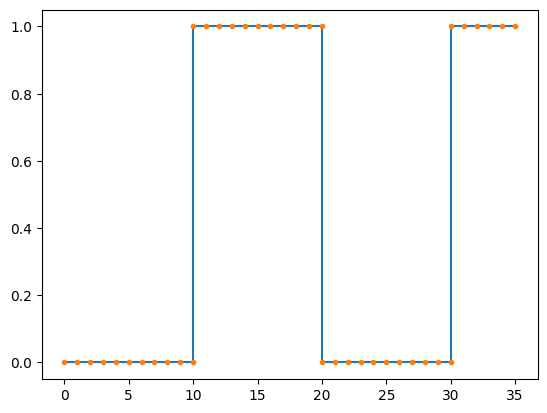

In [5]:
example_add = PulseTrain( [-10,10,-10,5 ]  )
print(example_add)
ts,expanded = example_add.expand()
plt.plot(ts,expanded)
plt.plot(ts,expanded,".")

CASE: 0


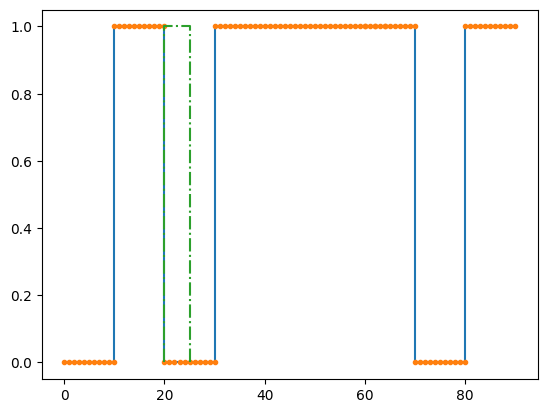

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=20, t_width=5
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=10, t_width=5
Skipping pulse, new pulse doesnt start till after
idx=2, current_node.data=-10, t_start=0, t_width=5
current_node.data=-10, t_width=5, delay=-10, t_start=0
Adding ++- pulse
-10 -> 10 -> 5 -> -5 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)


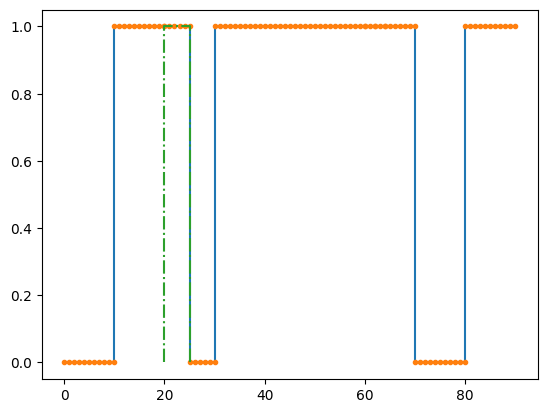

CASE: 1


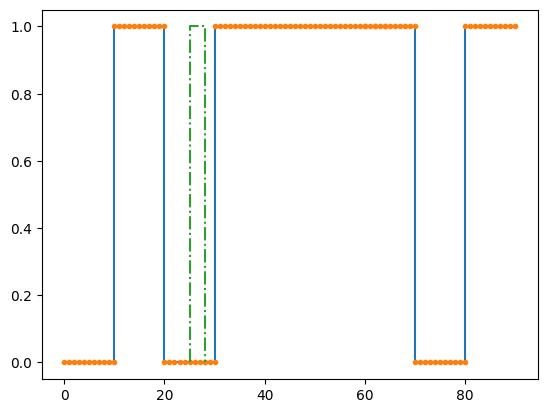

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=25, t_width=3
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=15, t_width=3
Skipping pulse, new pulse doesnt start till after
idx=2, current_node.data=-10, t_start=5, t_width=3
current_node.data=-10, t_width=3, delay=-5, t_start=5
Adding -+- pulse
-10 -> 10 -> -5 -> 3 -> -2 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)


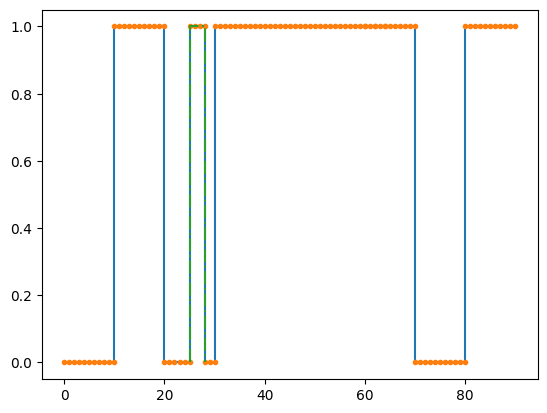

CASE: 2


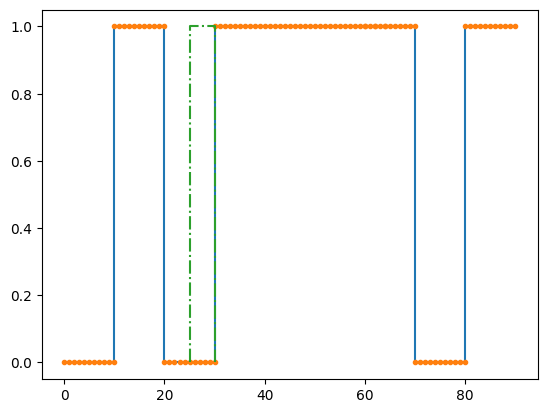

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=25, t_width=5
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=15, t_width=5
Skipping pulse, new pulse doesnt start till after
idx=2, current_node.data=-10, t_start=5, t_width=5
current_node.data=-10, t_width=5, delay=-5, t_start=5
Adding -++ pulse
-10 -> 10 -> -5 -> 5 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)


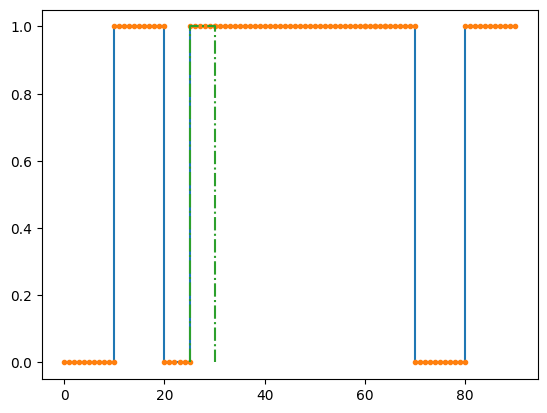

CASE: 3


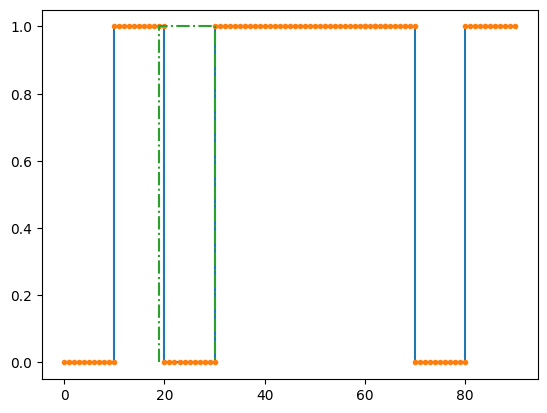

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=19, t_width=11
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=9, t_width=11
current_node.data=10, t_width=11, delay=-1, t_start=9
Positive pulse overlap of -1
idx=2, current_node.data=-10, t_start=0, t_width=10
current_node.data=-10, t_width=10, delay=-10, t_start=0
Adding +++ pulse
-10 -> 10 -> 10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)


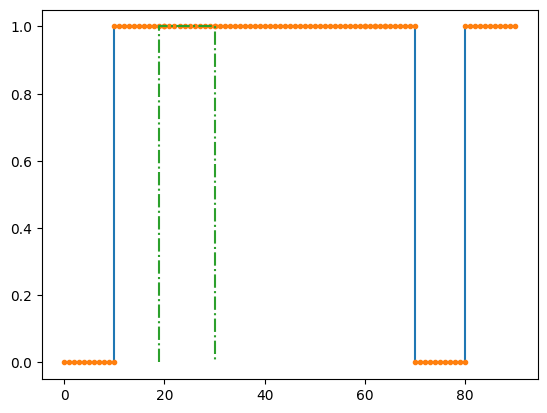

CASE: 4


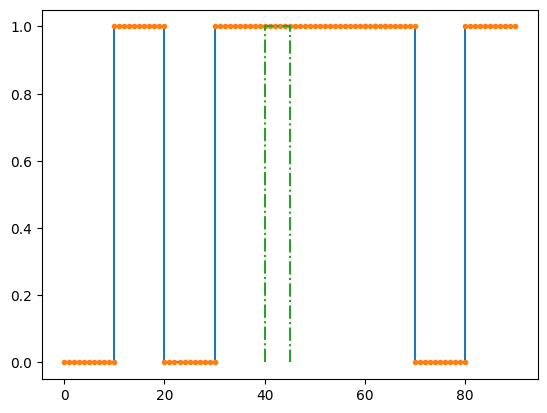

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=40, t_width=5
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=30, t_width=5
Skipping pulse, new pulse doesnt start till after
idx=2, current_node.data=-10, t_start=20, t_width=5
Skipping pulse, new pulse doesnt start till after
idx=3, current_node.data=30, t_start=10, t_width=5
current_node.data=30, t_width=5, delay=-20, t_start=10
Positive pulse overlap of -20
-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)


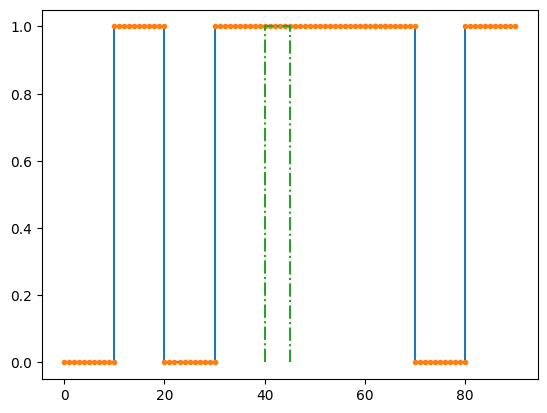

CASE: 5


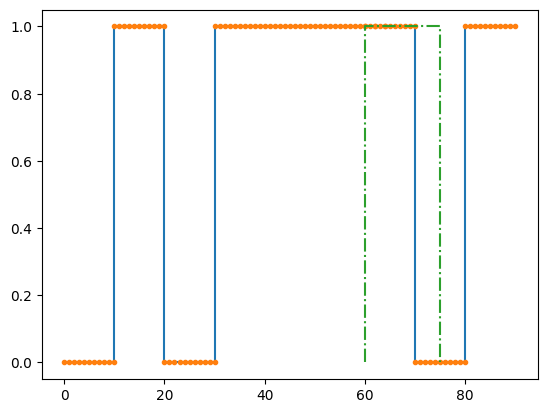

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=60, t_width=15
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=50, t_width=15
Skipping pulse, new pulse doesnt start till after
idx=2, current_node.data=-10, t_start=40, t_width=15
Skipping pulse, new pulse doesnt start till after
idx=3, current_node.data=30, t_start=30, t_width=15
Skipping pulse, new pulse doesnt start till after
idx=4, current_node.data=2, t_start=0, t_width=15
current_node.data=2, t_width=15, delay=-2, t_start=0
Positive pulse overlap of -2
idx=5, current_node.data=2, t_start=0, t_width=13
current_node.data=2, t_width=13, delay=-2, t_start=0
Positive pulse overlap of -2
idx=6, current_node.data=6, t_start=0, t_width=11
current_node.data=6, t_width=11, delay=-6, t_start=0
Positive pulse overlap of -6
idx=7, current_node.data=-10, t_start=0, t_width=5
current_node.data=-10, t_width=5, delay=-10, t_start=0
Adding ++- pulse
-10 -> 10 

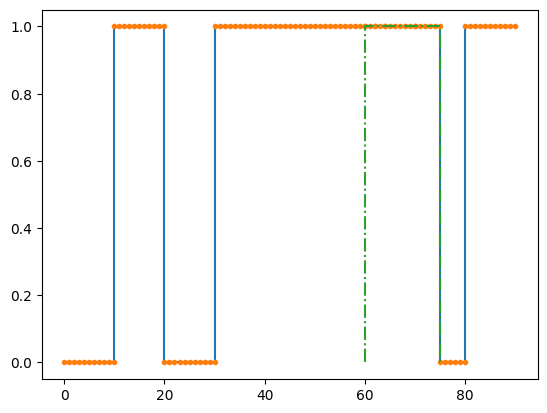

CASE: 6


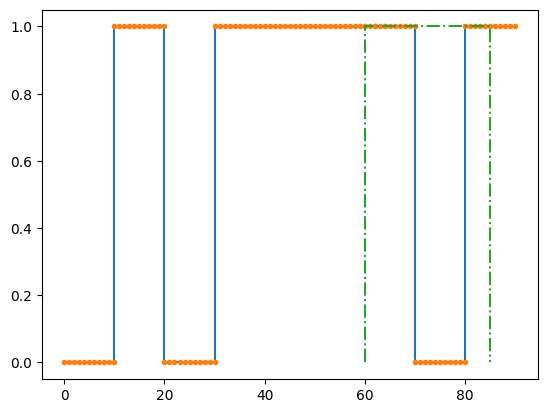

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=60, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=50, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=2, current_node.data=-10, t_start=40, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=3, current_node.data=30, t_start=30, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=4, current_node.data=2, t_start=0, t_width=25
current_node.data=2, t_width=25, delay=-2, t_start=0
Positive pulse overlap of -2
idx=5, current_node.data=2, t_start=0, t_width=23
current_node.data=2, t_width=23, delay=-2, t_start=0
Positive pulse overlap of -2
idx=6, current_node.data=6, t_start=0, t_width=21
current_node.data=6, t_width=21, delay=-6, t_start=0
Positive pulse overlap of -6
idx=7, current_node.data=-10, t_start=0, t_width=15
current_node.data=-10, t_width=15, delay=-10, t_start=0
Adding +++ pulse
idx=8, c

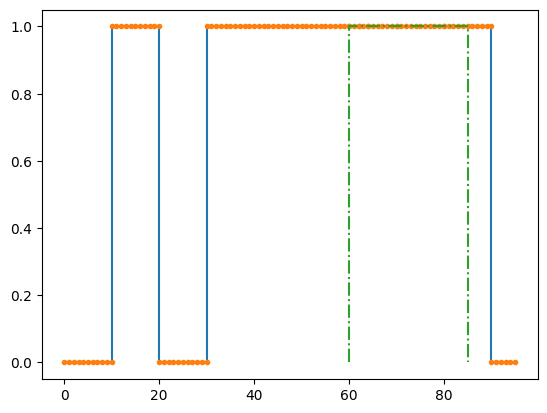

CASE: 7


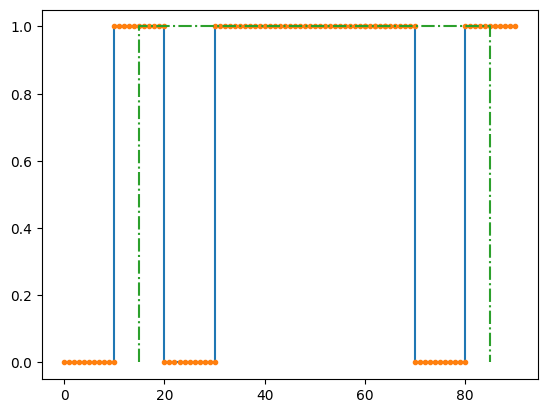

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=15, t_width=70
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=5, t_width=70
current_node.data=10, t_width=70, delay=-5, t_start=5
Positive pulse overlap of -5
idx=2, current_node.data=-10, t_start=0, t_width=65
current_node.data=-10, t_width=65, delay=-10, t_start=0
Adding +++ pulse
idx=3, current_node.data=30, t_start=0, t_width=55
current_node.data=30, t_width=55, delay=-30, t_start=0
Positive pulse overlap of -30
idx=4, current_node.data=2, t_start=0, t_width=25
current_node.data=2, t_width=25, delay=-2, t_start=0
Positive pulse overlap of -2
idx=5, current_node.data=2, t_start=0, t_width=23
current_node.data=2, t_width=23, delay=-2, t_start=0
Positive pulse overlap of -2
idx=6, current_node.data=6, t_start=0, t_width=21
current_node.data=6, t_width=21, delay=-6, t_start=0
Positive pulse overlap of -6
idx=7, current_node.data=-10, t_start=0, t_wi

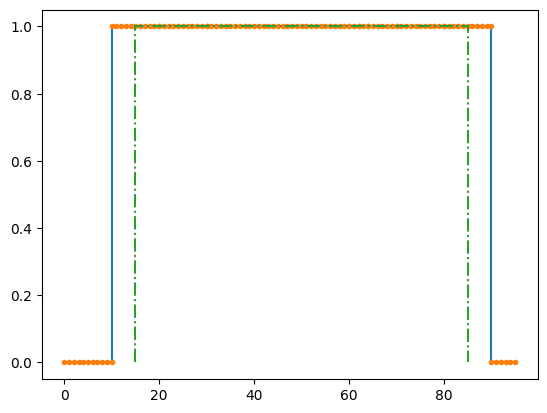

CASE: 8


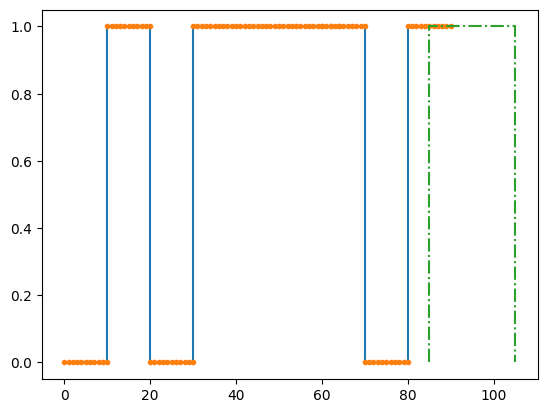

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=85, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=75, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=2, current_node.data=-10, t_start=65, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=3, current_node.data=30, t_start=55, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=4, current_node.data=2, t_start=25, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=5, current_node.data=2, t_start=23, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=6, current_node.data=6, t_start=21, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=7, current_node.data=-10, t_start=15, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=8, current_node.data=10, t_start=5, t_width=20
current_node.data=10, t_width=20, delay=-5, t_start=5
Positive pulse ove

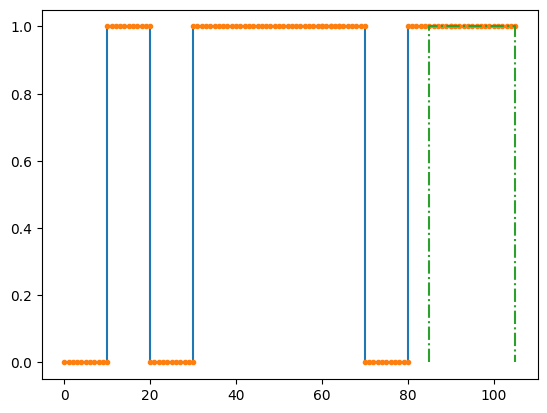

CASE: 9


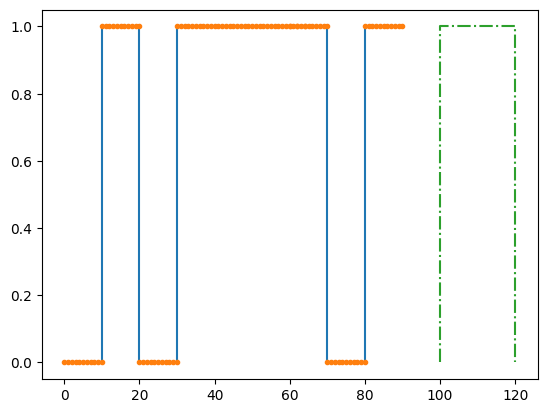

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
Adding new pulse to end of train
-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> -10 -> 20 -> (None)


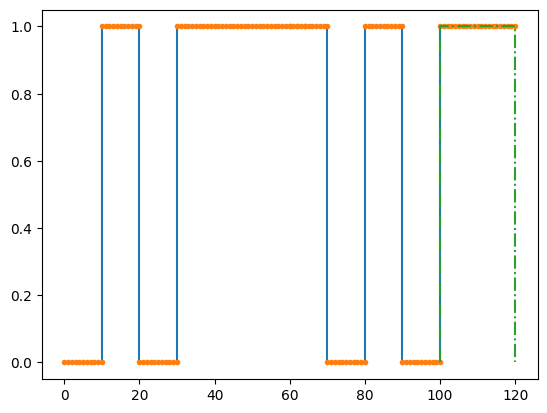

CASE: 10


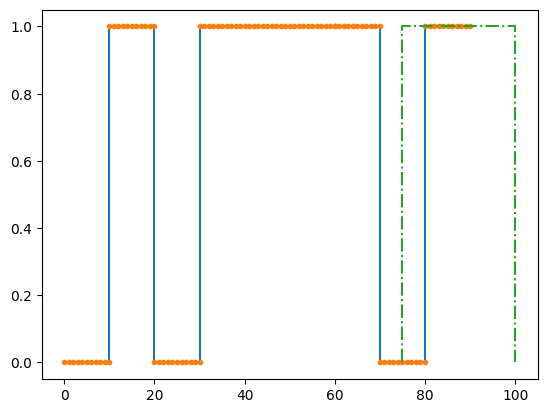

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=75, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=65, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=2, current_node.data=-10, t_start=55, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=3, current_node.data=30, t_start=45, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=4, current_node.data=2, t_start=15, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=5, current_node.data=2, t_start=13, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=6, current_node.data=6, t_start=11, t_width=25
Skipping pulse, new pulse doesnt start till after
idx=7, current_node.data=-10, t_start=5, t_width=25
current_node.data=-10, t_width=25, delay=-5, t_start=5
Adding -++ pulse
idx=9, current_node.data=10, t_start=0, t_width=20
current_node.data=10, t_width=20, delay=-10, t_star

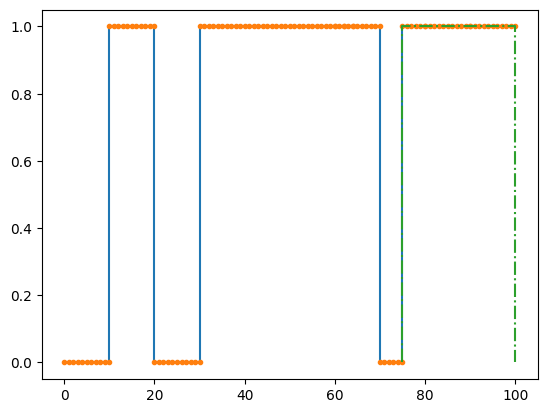

CASE: 11


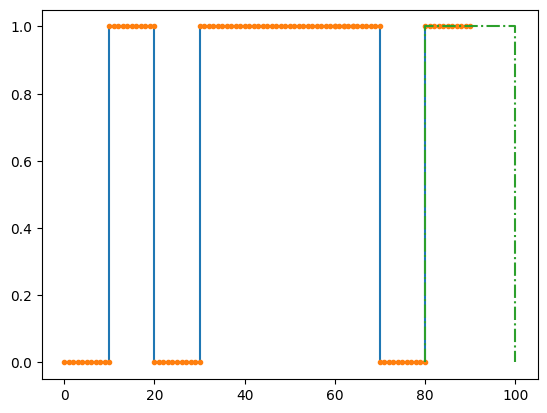

-10 -> 10 -> -10 -> 30 -> 2 -> 2 -> 6 -> -10 -> 10 -> (None)
idx=0, current_node.data=-10, t_start=80, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=1, current_node.data=10, t_start=70, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=2, current_node.data=-10, t_start=60, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=3, current_node.data=30, t_start=50, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=4, current_node.data=2, t_start=20, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=5, current_node.data=2, t_start=18, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=6, current_node.data=6, t_start=16, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=7, current_node.data=-10, t_start=10, t_width=20
Skipping pulse, new pulse doesnt start till after
idx=8, current_node.data=10, t_start=0, t_width=20
current_node.data=10, t_width=20, delay=-10, t_start=0
Positive pulse ov

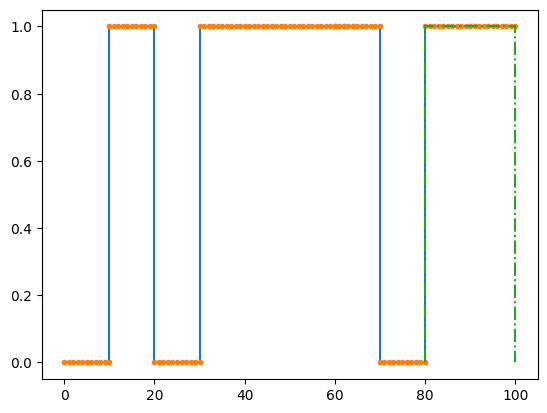

In [60]:

"""
Cases to verify:

0) New pulse is entirely between existing pulses
1) New pulse overlaps previous pulse
    1') adjacent
2) New pulse overlaps next pulse
    2') adjacent
3) New pulse overlaps both previous and preceeding pulse
    3') adjacent

4) New pulse is entirely contained within existing pulse
    4') adjacent
    *) Pulse train is unchanged
5) Pulse start is beyond scope of current buffer
6) Pulse start is within scope, but stop is beyond scope
    6') Starting on positive
    6'') starting on negative

7) All cases with either current_state = 0 or current_state = 1

"""


"""
*) directly adjacent edges should be considered overlapping, with 0 width
*)  classify cases based on whether new pulses' rising and falling edges:
        *) lie within existing pulses
        *) lie within dead zones
        *) lie within the same existing pulses
        *) lie within the same dead zone
"""

labels=("t_start", "t_width")
cases=[]
cases.append( (20,5) )
cases.append( (25,3) )
cases.append( (25,5) )
cases.append( (19,11) )
cases.append( (40,5) )
cases.append( (60,15) )
cases.append( (60,25) )
cases.append( (15,70) )
cases.append( (85,20) )
cases.append( (100,20) )
cases.append( (75, 25) )
cases.append( (80, 20) )

initial_train_data=[-10,10,-10,30,2,2,6,-10,10 ]
test_list=[]

for (idx, case) in enumerate(cases):
    train = PulseTrain( initial_train_data, verbose=True  )
    current_test={}
    
    
    print(f"CASE: {idx}")
    #unpack the case
    t_start = case[0]
    t_width = case[1]
    current_test['t_start'] = t_start
    current_test['t_width'] = t_width
    
    #Plot the existsing pulse stream and the desired new pulse
    ts,expanded = train.expand()
    plt.plot(ts,expanded)
    plt.plot(ts,expanded,".")
    ts_new, expanded_new = expand_new_pulse(t_start,t_width)
    plt.plot(ts_new,expanded_new,"-.") 
    plt.show()
    
    print(train)
    train.add_pulse(t_start,t_width)
    print(train)
    ts,expanded = train.expand()
    plt.plot(ts,expanded)
    plt.plot(ts,expanded,".")
    plt.plot(ts_new,expanded_new,"-.") 
    plt.show()
    
    current_test['new_train_data'] = train.get_data()

    test_list.append(current_test)

In [64]:
for test in test_list:
    print(len(test['new_train_data']))

10
11
10
9
9
10
10
10
10
11
11
10


In [90]:
import os
current_path = os.getcwd()

def list_to_cpp(list_data):
    #Just replace the '[,]' with '{,}'
    return str(list_data).replace('[','{').replace(']','}')

def generate_cpp_test_header(list_of_tests,init_pulse_train_data,fname="PulseTrainTest.h"):
    num_cases=len(list_of_tests)
    ## Unpack the list of tests
    t_start_list = [ test['t_start'] for test in list_of_tests  ]
    t_width_list = [ test['t_width'] for test in list_of_tests  ]
    new_train_length_list = [  len(test['new_train_data']) for test in list_of_tests]
    
    with open(os.path.join(current_path,fname), 'w') as f_handle:
        f_handle.write('// Autogenerated header test info\n')
        f_handle.write('// Do not manually adjust this file\n')
        f_handle.write('#ifndef PULSETRAINTEST_H\n')
        f_handle.write('#define PULSETRAINTEST_H\n')
        f_handle.write('\n\n\n')

        f_handle.write("namespace PulseTrainTest {\n\n")

        
        f_handle.write(f'int32_t init_pulse_train_data[{len(init_pulse_train_data)}] = {list_to_cpp(init_pulse_train_data)};\n')

        f_handle.write(f"\n\nint32_t num_test_cases={num_cases};\n")
        f_handle.write(f'int32_t t_start_arr[{num_cases}] = {list_to_cpp( t_start_list )};\n')
        f_handle.write(f'int32_t t_width_arr[{num_cases}] = {list_to_cpp( t_width_list )};\n')
        
        f_handle.write('\n')
        

        for (idx, test) in enumerate(list_of_tests):
            f_handle.write(f'int32_t new_train_data_{idx}[{len(test["new_train_data"])}] = {list_to_cpp( test["new_train_data"] )};\n')

        f_handle.write('\n')
        f_handle.write(f'int32_t new_train_length_arr[{num_cases}] = {list_to_cpp( new_train_length_list )};\n')

        ### Generate the correct cpp string
        str_list_of_names = list(str([ "&new_train_data_"+str(idx)+"[0]" for idx in range(num_cases)   ]).replace("\'",""))
        str_list_of_names[0]='{'
        str_list_of_names[-1]='}'
        str_list_of_names = "".join(str_list_of_names)
        #print(str_list_of_names)
        
        f_handle.write(f'int32_t* new_train_ptrs[{num_cases}] = { str_list_of_names  } ;\n')
        
        f_handle.write("\n\n}\n\n")
        f_handle.write('#endif')
generate_cpp_test_header(test_list,initial_train_data)

In [43]:
generate_cpp_test_header([])

In [47]:
str([-10,10,20,40]).replace('[','{').replace(']','}')

'{-10, 10, 20, 40}'

In [72]:
list_to_cpp([ "&new_train_data_"+str(idx) for idx in range(4)   ]).replace('\'','')

'{&new_train_data_0, &new_train_data_1, &new_train_data_2, &new_train_data_3}'